In [10]:
# import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Load the dataset
df = pd.read_csv("house_price.csv")
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [12]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

In [13]:
df.shape

(1460, 11)

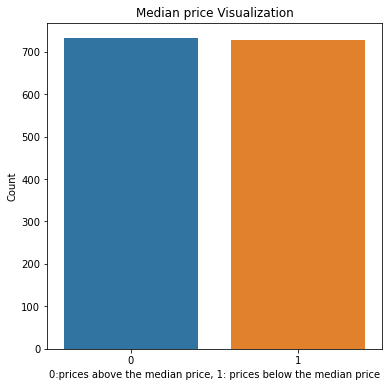

In [14]:
# Visualizing the count of 'AboveMedianPrice' in the dataset
plt.figure(figsize=(6,6))
sns.countplot(x='AboveMedianPrice', data=df)
plt.xlabel('0:prices above the median price, 1: prices below the median price')
plt.ylabel('Count')
plt.title('Median price Visualization')
plt.show()

In [15]:
# Count of 0 and 1
df['AboveMedianPrice'].value_counts()

0    732
1    728
Name: AboveMedianPrice, dtype: int64

In [16]:
df.isnull().any()

LotArea             False
OverallQual         False
OverallCond         False
TotalBsmtSF         False
FullBath            False
HalfBath            False
BedroomAbvGr        False
TotRmsAbvGrd        False
Fireplaces          False
GarageArea          False
AboveMedianPrice    False
dtype: bool

## Data Preprocessing ##

In [17]:
# Feature columns
X = df.drop('AboveMedianPrice', axis=1)
# Tatget column
Y = df['AboveMedianPrice']

In [18]:
# Normalising all the feature columns :Feature Scaling 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [19]:
# Display
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [20]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Building and Training our First Neural Network ##

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [23]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 0s 14ms/step - loss: 0.6850 - accuracy: 0.6556 - val_loss: 0.6810 - val_accuracy: 0.7123
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6908 - val_loss: 0.6771 - val_accuracy: 0.7397
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.6957 - val_loss: 0.6735 - val_accuracy: 0.7580
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6745 - accuracy: 0.7172 - val_loss: 0.6701 - val_accuracy: 0.7580
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6713 - accuracy: 0.7319 - val_loss: 0.6668 - val_accuracy: 0.7626
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.7456 - val_loss: 0.6637 - val_accuracy: 0.7763
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.7554 - val_loss: 0.6605 - val_accuracy: 0.7854
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3565 - accuracy: 0.8620 - val_loss: 0.3623 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3536 - accuracy: 0.8611 - val_loss: 0.3596 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8620 - val_loss: 0.3573 - val_accuracy: 0.8721
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8640 - val_loss: 0.3558 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8669 - val_loss: 0.3526 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3417 - accuracy: 0.8699 - val_loss: 0.3512 - val_accuracy: 0.8676
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.8699 - val_loss: 0.3488 - val_accuracy: 0.8676
Epoch 

In [25]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9361


0.9360730648040771

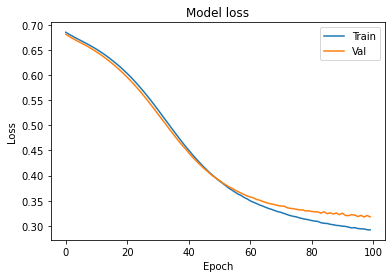

In [26]:
# Plot Model loss
import matplotlib
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

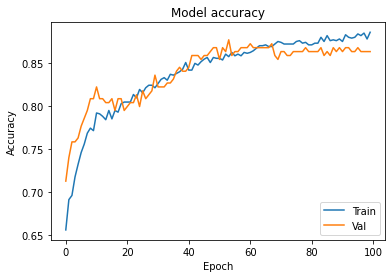

In [28]:
# Plot Model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## L2 regularization and dropout ##
### Regularization helps in reducing Overfitting for our model ###

In [29]:
# Import regulizers and Dropout
from keras.layers import Dropout
from keras import regularizers

In [30]:
# Added kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [31]:
# Compile
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
# Fit the model
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5012 - accuracy: 0.7750 - val_loss: 0.4199 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3607 - accuracy: 0.8493 - val_loss: 0.3397 - val_accuracy: 0.8676
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3083 - accuracy: 0.8689 - val_loss: 0.3431 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2707 - accuracy: 0.8845 - val_loss: 0.2887 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2938 - accuracy: 0.8796 - val_loss: 0.3445 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 31ms/step - loss: 0.2611 - accuracy: 0.8914 - val_loss: 0.3170 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2630 - accuracy: 0.8826 - val_loss: 0.3456 - val_accuracy: 0.8539
Epoch 

32/32 [==============================] - 1s 30ms/step - loss: 0.1346 - accuracy: 0.9344 - val_loss: 0.5634 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 30ms/step - loss: 0.1544 - accuracy: 0.9305 - val_loss: 0.4466 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1562 - accuracy: 0.9305 - val_loss: 0.4151 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 1s 33ms/step - loss: 0.1629 - accuracy: 0.9178 - val_loss: 0.4557 - val_accuracy: 0.8402
Epoch 62/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1729 - accuracy: 0.9344 - val_loss: 0.4013 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 1s 33ms/step - loss: 0.1501 - accuracy: 0.9305 - val_loss: 0.6310 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1396 - accuracy: 0.9393 - val_loss: 0.4692 - val_accuracy: 0.8676
Epoch 65/100

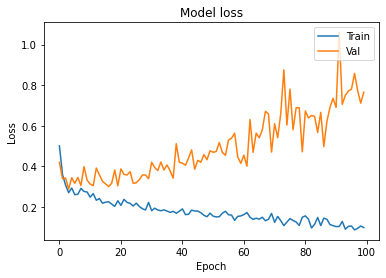

In [33]:
# Plot Model Loss
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

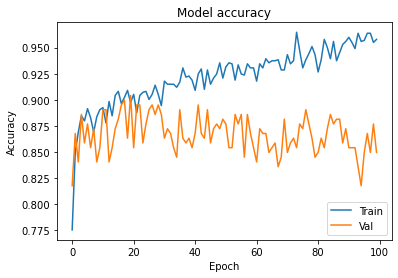

In [34]:
# Plot Model accuracy
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [36]:
# Evaluate the model
scores= model_2.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.78%


#### Achieved 91.78%  accuracy using ANN